In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.Gender = df.Gender.map({'Male' : 1, 'Female' : 0})
df
     

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [4]:
df.drop(['User ID'], axis = 1, inplace = True)

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(380, 4)

In [8]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 80)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve, roc_auc_score, f1_score, confusion_matrix, accuracy_score
for depth in range(1,20) :
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    dt_score = dt.score(X_train, y_train) 
    val_score = np.mean(cross_val_score(dt, X_train, y_train, cv = 10, scoring = 'roc_auc'))
    print('Depth : ', depth, 'Train Score : ', dt_score, 'CV Score : ', val_score)

Depth :  1 Train Score :  0.8157894736842105 CV Score :  0.764398395721925
Depth :  2 Train Score :  0.8872180451127819 CV Score :  0.8860812165775401
Depth :  3 Train Score :  0.8872180451127819 CV Score :  0.9103308823529412
Depth :  4 Train Score :  0.9285714285714286 CV Score :  0.9256985294117648
Depth :  5 Train Score :  0.9360902255639098 CV Score :  0.9047810828877006
Depth :  6 Train Score :  0.9624060150375939 CV Score :  0.8710929144385027
Depth :  7 Train Score :  0.9661654135338346 CV Score :  0.8494502005347593
Depth :  8 Train Score :  0.9736842105263158 CV Score :  0.8479913101604278
Depth :  9 Train Score :  0.981203007518797 CV Score :  0.840614973262032
Depth :  10 Train Score :  0.9887218045112782 CV Score :  0.8407286096256683
Depth :  11 Train Score :  0.9924812030075187 CV Score :  0.8342713903743315
Depth :  12 Train Score :  0.9962406015037594 CV Score :  0.8358155080213903
Depth :  13 Train Score :  0.9962406015037594 CV Score :  0.8306316844919787
Depth :  14

In [13]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [14]:
y_predict = dt.predict(X_test)
y_predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1], dtype=int64)

In [15]:
df_predict = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})
df_predict

,Actual,Predicted
328,1,0
78,0,0
365,1,1
274,1,1
289,1,0
...,...,...
135,0,0
64,0,1
111,0,0
219,1,1


In [16]:
accuracy_score(y_test, y_predict)
     

0.9035087719298246

In [17]:
confusion_matrix(y_test, y_predict)
     

array([[72,  4],
       [ 7, 31]], dtype=int64)

In [18]:
f1_score(y_test, y_predict)

0.8493150684931505

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


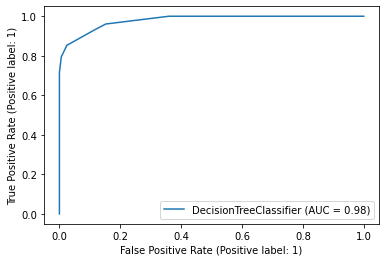

In [19]:
plot_roc_curve(dt, X_train, y_train)

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

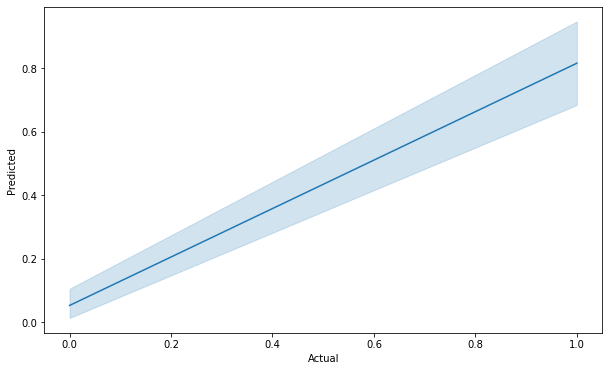

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
sns.lineplot(x = 'Actual', y = 'Predicted', data = df_predict)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


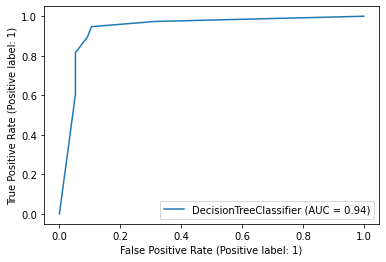

In [21]:
plot_roc_curve(dt, X_test, y_test)

[Text(0.4880952380952381, 0.9, 'X[1] <= 0.363\ngini = 0.473\nsamples = 266\nvalue = [164, 102]'),
 Text(0.23809523809523808, 0.7, 'X[2] <= 0.56\ngini = 0.284\nsamples = 175\nvalue = [145, 30]'),
 Text(0.09523809523809523, 0.5, 'X[1] <= -0.112\ngini = 0.067\nsamples = 144\nvalue = [139, 5]'),
 Text(0.047619047619047616, 0.3, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.14285714285714285, 0.3, 'X[2] <= 0.331\ngini = 0.224\nsamples = 39\nvalue = [34, 5]'),
 Text(0.09523809523809523, 0.1, 'gini = 0.188\nsamples = 38\nvalue = [34, 4]'),
 Text(0.19047619047619047, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.38095238095238093, 0.5, 'X[2] <= 1.347\ngini = 0.312\nsamples = 31\nvalue = [6, 25]'),
 Text(0.3333333333333333, 0.3, 'X[2] <= 1.018\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.2857142857142857, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.38095238095238093, 0.1, 'gini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.42857142857142855, 0.3, '

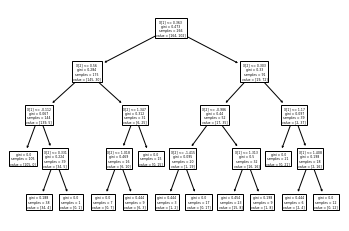

In [22]:
from sklearn import tree
tree.plot_tree(dt)

[Text(0.4880952380952381, 0.9, 'Age <= 0.363\ngini = 0.473\nsamples = 266\nvalue = [164, 102]'),
 Text(0.23809523809523808, 0.7, 'EstimatedSalary <= 0.56\ngini = 0.284\nsamples = 175\nvalue = [145, 30]'),
 Text(0.09523809523809523, 0.5, 'Age <= -0.112\ngini = 0.067\nsamples = 144\nvalue = [139, 5]'),
 Text(0.047619047619047616, 0.3, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.14285714285714285, 0.3, 'EstimatedSalary <= 0.331\ngini = 0.224\nsamples = 39\nvalue = [34, 5]'),
 Text(0.09523809523809523, 0.1, 'gini = 0.188\nsamples = 38\nvalue = [34, 4]'),
 Text(0.19047619047619047, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.38095238095238093, 0.5, 'EstimatedSalary <= 1.347\ngini = 0.312\nsamples = 31\nvalue = [6, 25]'),
 Text(0.3333333333333333, 0.3, 'EstimatedSalary <= 1.018\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.2857142857142857, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.38095238095238093, 0.1, 'gini = 0.444\nsamples = 9\nvalue = [

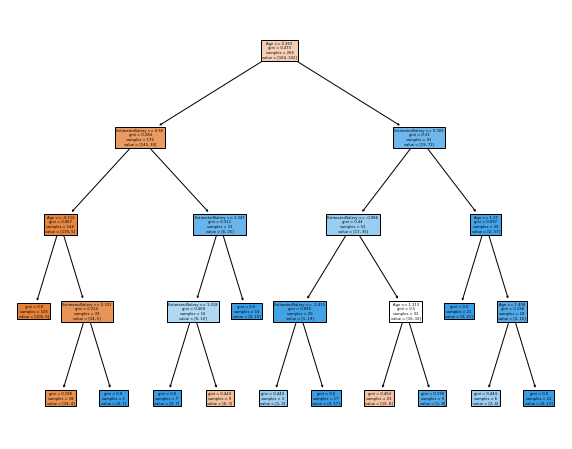

In [23]:
plt.figure(figsize = (10,8))
tree.plot_tree(dt, feature_names =['Gender', 'Age', 'EstimatedSalary'], filled = True)